# android security dataset Machine learning anlysis

# Import the required library

In [49]:
import os
import shutil
import pandas as pd
import sklearn
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from androguard.core.bytecodes.apk import APK
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

dataset_df = pd.read_csv('CICInvesAndMal2019/preprocessed_android_dataset.csv', index_col=False)  

# partI: Traditional Machine Learning Models

In [50]:

Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [65]:
KNN_model = KNeighborsClassifier(n_neighbors=8)
KNN_model.fit(X_train, y_train)
KNN_predictions  = KNN_model.predict(X_test)
print(KNN_predictions)

['malign' 'benign' 'benign' 'malign' 'benign' 'malign' 'malign' 'benign'
 'malign' 'malign' 'benign' 'benign' 'malign' 'malign' 'malign' 'malign'
 'benign' 'malign' 'malign' 'malign' 'malign' 'benign' 'benign' 'malign'
 'benign' 'benign' 'benign' 'benign' 'malign' 'malign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malign' 'benign' 'malign' 'benign' 'malign'
 'malign' 'benign' 'malign' 'benign' 'benign' 'malign' 'benign' 'benign'
 'malign' 'malign' 'malign' 'malign' 'benign' 'benign' 'benign' 'malign'
 'malign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malign' 'benign' 'malign' 'benign' 'benign'
 'malign' 'benign' 'malign' 'benign' 'benign' 'malign' 'benign' 'benign'
 'benign' 'benign' 'malign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'benign' 'malign' 'malign' 'malign' 'malign' 'benign' 'benign' 'benign'
 'benign' 'malign' 'benign' 'malign' 'malign' 'benign' 'benign' 'malign'
 'benign' 'malign' 'benign' 'benign' 'benign' 'mali

In [66]:
print('partt1.1:KNN result')
print('-'*40)
print(classification_report(y_test, KNN_predictions)) 

partt1.1:KNN 结果
----------------------------------------
              precision    recall  f1-score   support

      benign       0.85      0.89      0.87        80
      malign       0.83      0.77      0.80        56

    accuracy                           0.84       136
   macro avg       0.84      0.83      0.83       136
weighted avg       0.84      0.84      0.84       136



In [67]:
LG_model = LogisticRegression()
LG_model.fit(X_train, y_train)
LG_predictions  = LG_model.predict(X_test)
print(LG_predictions)

['malign' 'benign' 'benign' 'malign' 'benign' 'malign' 'malign' 'benign'
 'malign' 'malign' 'benign' 'benign' 'malign' 'malign' 'malign' 'malign'
 'benign' 'malign' 'malign' 'malign' 'malign' 'benign' 'benign' 'malign'
 'benign' 'benign' 'benign' 'malign' 'malign' 'malign' 'benign' 'benign'
 'benign' 'benign' 'malign' 'malign' 'benign' 'malign' 'benign' 'malign'
 'malign' 'malign' 'malign' 'benign' 'benign' 'malign' 'benign' 'benign'
 'malign' 'malign' 'malign' 'benign' 'malign' 'benign' 'benign' 'malign'
 'malign' 'benign' 'benign' 'benign' 'benign' 'malign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malign' 'benign' 'malign' 'benign' 'benign'
 'malign' 'benign' 'malign' 'benign' 'benign' 'malign' 'benign' 'benign'
 'benign' 'benign' 'malign' 'benign' 'benign' 'benign' 'malign' 'benign'
 'malign' 'malign' 'malign' 'malign' 'malign' 'benign' 'benign' 'malign'
 'benign' 'malign' 'benign' 'malign' 'malign' 'benign' 'malign' 'malign'
 'benign' 'malign' 'benign' 'benign' 'benign' 'mali

In [68]:
print('partt1.2:LR result')
print('-'*40)
print(classification_report(y_test, LG_predictions)) 

partt1.2:LR 结果
----------------------------------------
              precision    recall  f1-score   support

      benign       0.92      0.84      0.88        80
      malign       0.79      0.89      0.84        56

    accuracy                           0.86       136
   macro avg       0.86      0.87      0.86       136
weighted avg       0.87      0.86      0.86       136



In [64]:

print('define parameter range:') 

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

SVC_Model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

 
SVC_Model.fit(X_train, y_train) 

定义参数范围
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, ker

[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.843 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.870 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.852 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.852 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.843 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.815 total time=   0.0s
[CV 5/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [56]:
print(SVC_Model.best_params_) 
grid_predictions = SVC_Model.predict(X_test) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [57]:
print('partt1.3: SVM')
print('-'*40)
print(classification_report(y_test, grid_predictions)) 

pickle.dump(SVC_Model, open('model/first_model.pkl', 'wb'))

partt1.3: SVM
----------------------------------------
              precision    recall  f1-score   support

      benign       0.95      0.90      0.92        80
      malign       0.87      0.93      0.90        56

    accuracy                           0.91       136
   macro avg       0.91      0.91      0.91       136
weighted avg       0.91      0.91      0.91       136



In [58]:
default = open('CICInvesAndMal2019/DefaultPermList.txt','r').readlines()
perms = [s.rstrip('\n') for s in default]

Predict

In [59]:

def mytest(apk):
  vector = {}
  a = APK(apk)
  perm = a.get_permissions()
  print(perm)
  for d in perms:
    if d in perm:
      vector[d]=1
    else:
      vector[d]=0
  input = [ v for v in vector.values() ]
  print(input)
  print(SVC_Model.predict([input]))


mytest('CICInvesAndMal2019/Ransomware/PornDroid/00c0a3916b33e792e4b5f23a3a58ec7d.apk')
mytest('CICInvesAndMal2019/Ransomware/PornDroid/1ad669a7c148352dbb5389a8238e8fa0.apk')

['android.permission.WRITE_SETTINGS', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.SYSTEM_ALERT_WINDOW', 'android.permission.WAKE_LOCK', 'android.permission.READ_CONTACTS', 'android.permission.READ_PHONE_STATE', 'android.permission.VIBRATE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.GET_TASKS', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.GET_ACCOUNTS', 'android.permission.INTERNET', 'android.permission.CAMERA']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# partII: ANN Fully connected deep learning model

# Fully connected deep learning model Multilayer Perceptron (Artificial Neural Network)
## Our Sequential model based on keras can build a very complex neural network to achieve a fully connected neural network:

## A sequential model is a linear stack of multiple network layers. Create a Sequential model by passing a list of network layer instances to the Sequential constructor

In [42]:
Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)
encoder = LabelEncoder().fit(Y)
Y = encoder.transform(Y)
#print(encoder.transform(['malign']))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [43]:
ANN_Model = Sequential()
ANN_Model.add(Dense(256, activation='relu', input_dim=409))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(128, activation='relu'))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(128, activation='relu'))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(32, activation='relu'))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(1, activation='sigmoid'))
ANN_Model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = ANN_Model.fit(X_train, y_train, epochs=100, batch_size=32)



scores = ANN_Model.evaluate(X_test, y_test)
for i in range(len(scores)):
  print("\n%s: %.2f%%" % (ANN_Model.metrics_names[i], scores[i]*100))


Epoch 1/100
 8/17 [=============>................] - ETA: 0s - loss: 0.6824 - accuracy: 0.5820

2022-08-08 18:29:37.008763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 0s 9ms/step - loss: 0.6832 - accuracy: 0.5833
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.6574
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6743 - accuracy: 0.6500
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6640 - accuracy: 0.6741
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6597 - accuracy: 0.6889
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6432 - accuracy: 0.7130
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6340 - accuracy: 0.7352
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6285 - accuracy: 0.7093
Epoch 9/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6176 - accuracy: 0.7537
Epoch 10/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6025 - accuracy: 0.7481
Epoch 11/100
17/17 [=

2022-08-08 18:29:49.197572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [44]:
print('模型结构')
print('-'*30)

print(ANN_Model.summary())



模型结构
------------------------------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               104960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)  

训练过程图



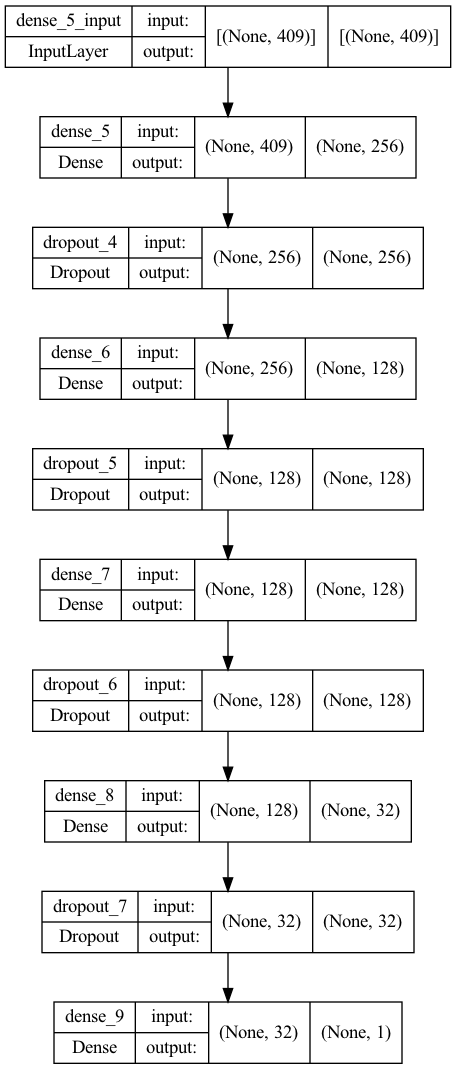

In [45]:
print('训练过程图\n')
plot_model(ANN_Model, to_file='i2model_plot.png', show_shapes=True, show_layer_names=True)

In [46]:
pickle.dump(ANN_Model, open('model/second_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://cffa7819-fa38-48f9-a9b1-82c0d12209a4/assets


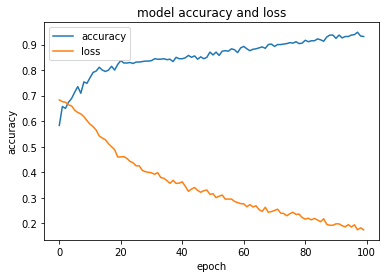

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

# partIII: Model effect comparison

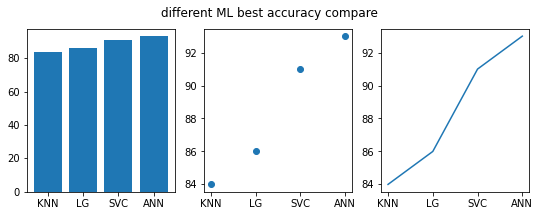

In [71]:
names = ['KNN', 'LG', 'SVC','ANN']
values = [84, 86, 91, 93]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('different ML best accuracy compare')
plt.show()